# Import libraries

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import plot_confusion_matrix,classification_report, accuracy_score
from sklearn.pipeline import Pipeline

# Read data

In [116]:
df = pd.read_csv('train.csv')

In [117]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [118]:
df = df.drop(['id', 'keyword', 'location'], axis=1)

In [119]:
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [120]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [121]:
df['text'].str.isspace().sum()

0

# EDA on target

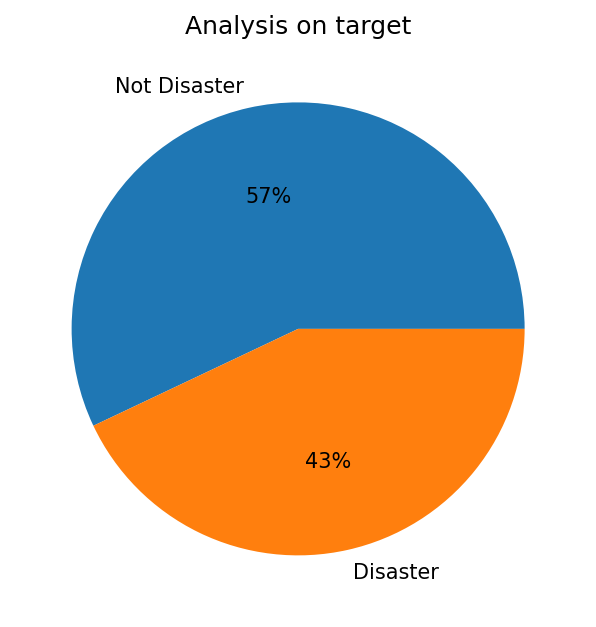

In [122]:
real_disaster = df[df['target'] == 1]
fake_disaster = df[df['target'] == 0]
data = [len(fake_disaster), len(real_disaster)]
labels  = ['Not Disaster', 'Disaster']
plt.figure(figsize=(5,5), dpi=150)
plt.pie(x = data, labels = labels, autopct='%.0f%%')
plt.title("Analysis on target")
plt.show()

<h1>EDA on bag of words<h1>

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

In [124]:
cv = CountVectorizer(stop_words='english')

In [125]:
matrix_real = cv.fit_transform(df[df['target'] == 1]['text'])
freqs_real = zip(cv.get_feature_names(), matrix_real.sum(axis=0).tolist()[0])
top_20_real = sorted(freqs_real, key=lambda x: -x[1])[:20]

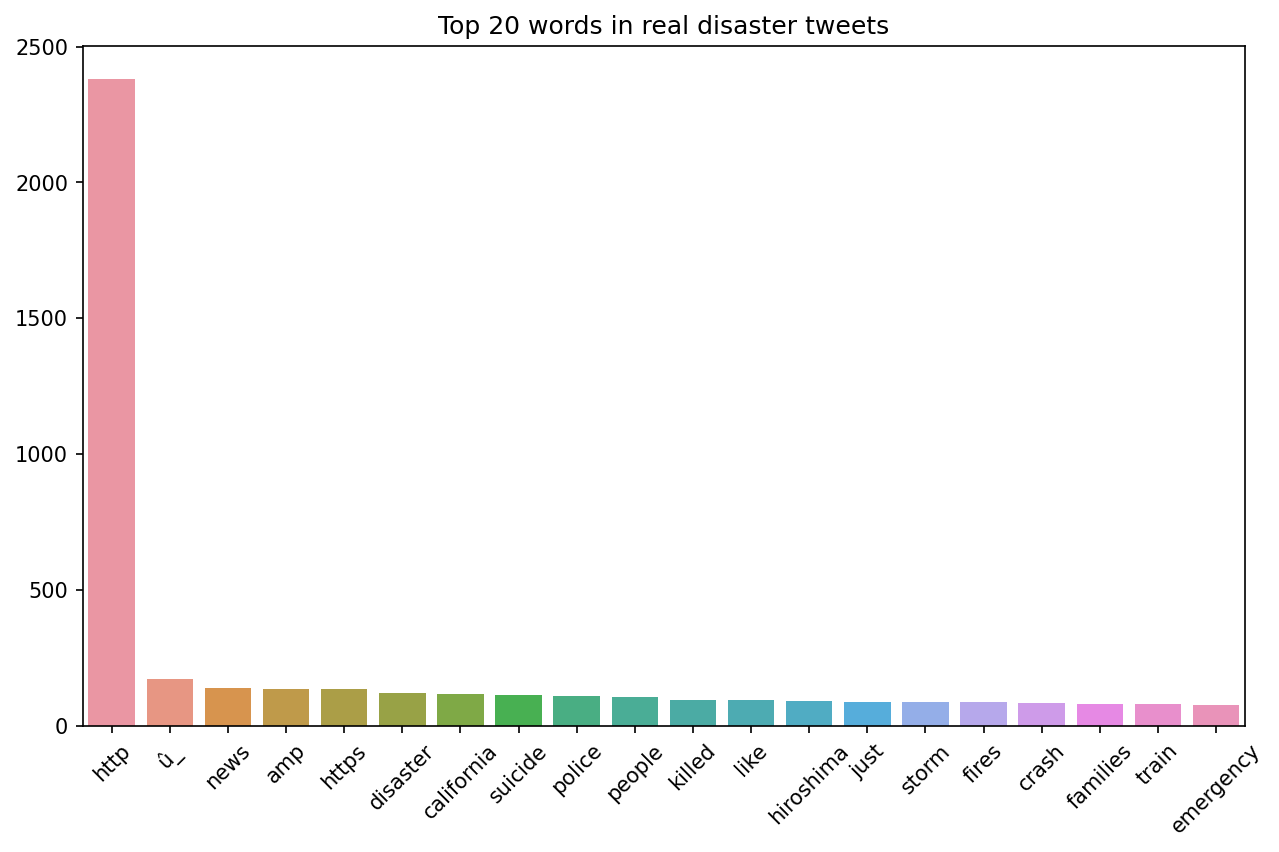

In [126]:
plt.figure(figsize=(10,6), dpi=150)
x_real = list()
y_real = list()
for word in top_20_real:
    x_real.append(word[0])
    y_real.append(word[1])
sns.barplot(x=x_real, y=y_real)
plt.xticks(rotation=45)
plt.title('Top 20 words in real disaster tweets')
plt.show()

In [127]:
matrix_fake = cv.fit_transform(df[df['target'] == 0]['text'])
freqs_fake = zip(cv.get_feature_names(), matrix_fake.sum(axis=0).tolist()[0])
top_20_fake = sorted(freqs_fake, key=lambda x: -x[1])[:20]

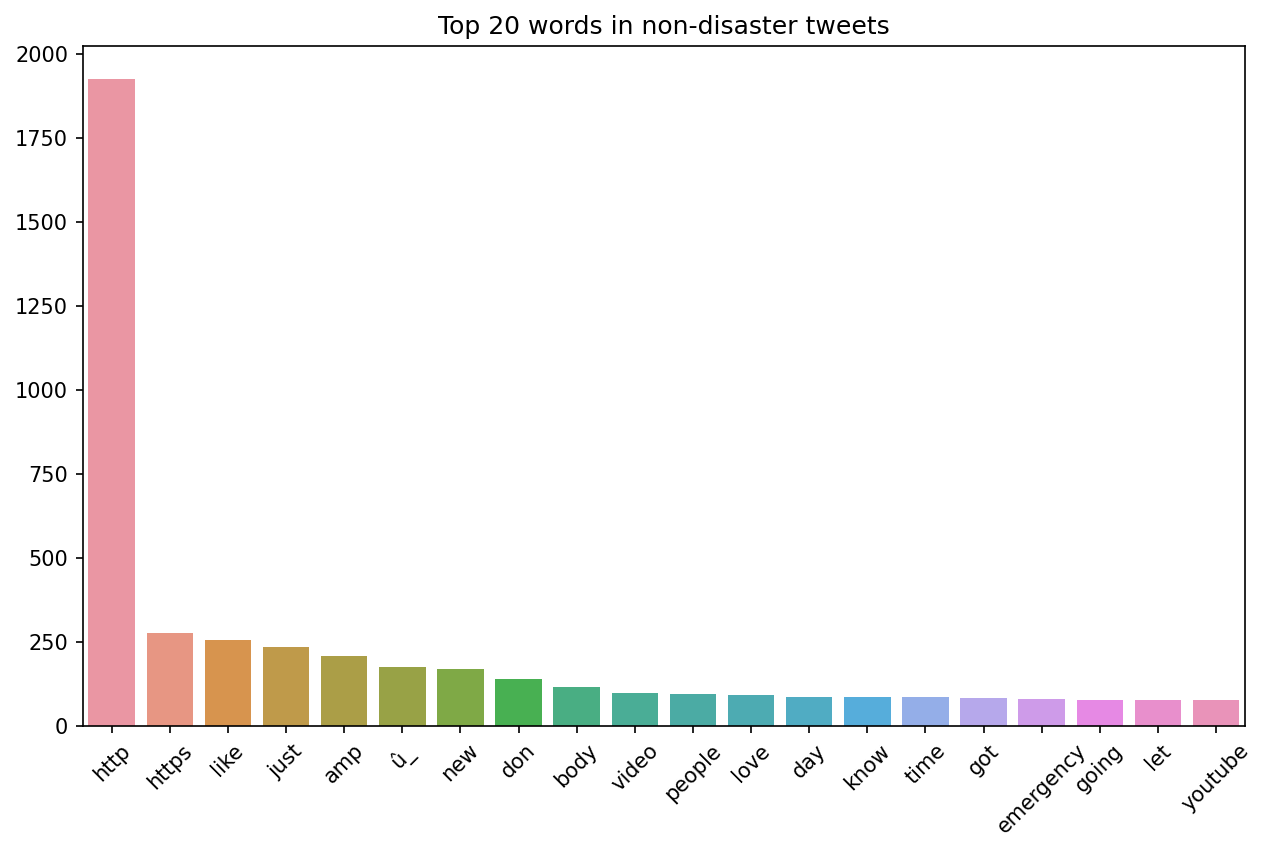

In [128]:
plt.figure(figsize=(10,6), dpi=150)
x_fake = list()
y_fake = list()
for word in top_20_fake:
    x_fake.append(word[0])
    y_fake.append(word[1])
sns.barplot(x=x_fake, y=y_fake)
plt.xticks(rotation=45)
plt.title('Top 20 words in non-disaster tweets')
plt.show()

<h1>Data Modelling<h1>

<h2>Train Test Split<h2>

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X = df['text']
y = df['target']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [132]:
acc_list = list()

<h2>Vectorization<h2>

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [134]:
tfidf = TfidfVectorizer(stop_words='english')

In [135]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [136]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

<h2>Naive Bayes classification<h2>

In [137]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [138]:
nb_pred = nb.predict(X_test_tfidf)

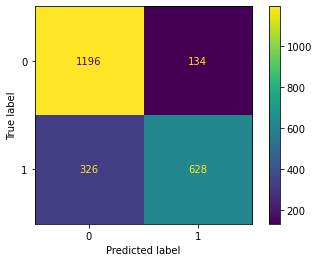

In [139]:
plot_confusion_matrix(nb, X_test_tfidf, y_test)

In [140]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1330
           1       0.82      0.66      0.73       954

    accuracy                           0.80      2284
   macro avg       0.80      0.78      0.79      2284
weighted avg       0.80      0.80      0.79      2284



In [141]:
nb_acc = accuracy_score(y_test, nb_pred)
acc_list.append(nb_acc * 100)

## Logistic Regression Classification

In [142]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [143]:
log_pred = log.predict(X_test_tfidf)

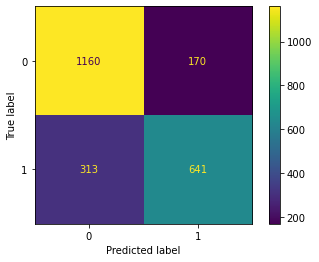

In [144]:
plot_confusion_matrix(log, X_test_tfidf, y_test)

In [145]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1330
           1       0.79      0.67      0.73       954

    accuracy                           0.79      2284
   macro avg       0.79      0.77      0.78      2284
weighted avg       0.79      0.79      0.79      2284



In [146]:
log_acc = accuracy_score(y_test, log_pred)
acc_list.append(log_acc * 100)

## Support Vector Machine Classification

In [147]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [148]:
svc_pred = svc.predict(X_test_tfidf)

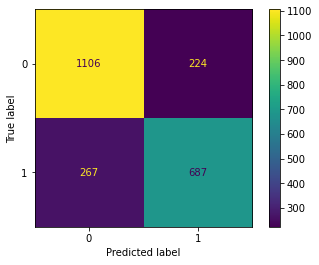

In [149]:
plot_confusion_matrix(svc, X_test_tfidf, y_test)

In [150]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1330
           1       0.75      0.72      0.74       954

    accuracy                           0.79      2284
   macro avg       0.78      0.78      0.78      2284
weighted avg       0.78      0.79      0.78      2284



In [151]:
svc_acc = accuracy_score(y_test, svc_pred)
acc_list.append(svc_acc * 100)

## Random Forest Classification

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rfc = RandomForestClassifier()

In [154]:
rfc.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [155]:
rfc_pred = rfc.predict(X_test_tfidf)

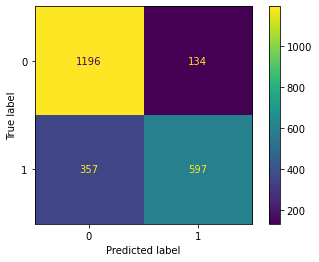

In [156]:
plot_confusion_matrix(rfc, X_test_tfidf, y_test)

In [157]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1330
           1       0.82      0.63      0.71       954

    accuracy                           0.79      2284
   macro avg       0.79      0.76      0.77      2284
weighted avg       0.79      0.79      0.78      2284



In [158]:
rfc_acc = accuracy_score(y_test, rfc_pred)
acc_list.append(rfc_acc * 100)

## KNearestNeighbors Classification

In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
knn = KNeighborsClassifier(n_neighbors=1)

In [161]:
knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=1)

In [162]:
knn_pred = knn.predict(X_test_tfidf)

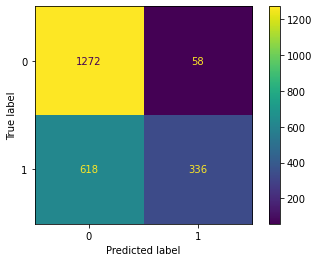

In [163]:
plot_confusion_matrix(knn, X_test_tfidf, y_test)

In [164]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79      1330
           1       0.85      0.35      0.50       954

    accuracy                           0.70      2284
   macro avg       0.76      0.65      0.64      2284
weighted avg       0.75      0.70      0.67      2284



In [165]:
knn_acc = accuracy_score(y_test, knn_pred)
acc_list.append(knn_acc * 100)

# Model Evaluation

In [178]:
model_list = ['Naive Bayes', 'Logistic Regression', 'SVC', 'Random Forest', 'KNearestNeighbors']

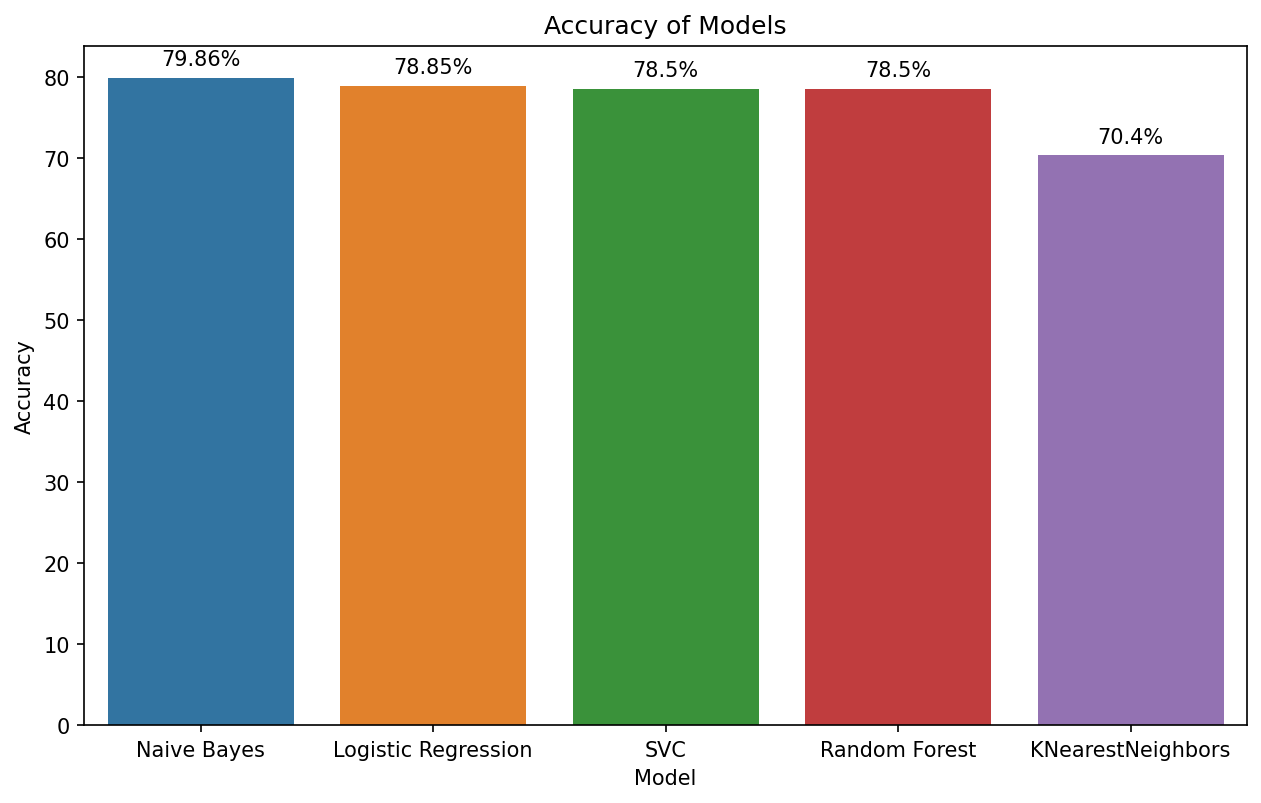

In [179]:
plt.figure(figsize=(10,6), dpi=150)
ax = sns.barplot(x=model_list, y=acc_list)
plt.title("Accuracy of Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')
plt.show()
    

# Pipeline

In [168]:
from sklearn.pipeline import Pipeline

In [169]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [170]:
pipe.fit(df['text'],df['target'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

<h1>Validation<h1>

In [180]:
val = pd.read_csv('test.csv')

In [181]:
val = val['text']

In [182]:
val_tfidf = tfidf.transform(val)

In [183]:
preds = nb.predict(val_tfidf)

In [184]:
res = pd.DataFrame()
res['text'] = val
res['pred'] = preds

In [185]:
res

,text,pred
0,Just happened a terrible car crash,1
1,"Heard about #earthquake is different cities, s...",0
2,"there is a forest fire at spot pond, geese are...",1
3,Apocalypse lighting. #Spokane #wildfires,1
4,Typhoon Soudelor kills 28 in China and Taiwan,1
...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1
3259,Storm in RI worse than last hurricane. My city...,1
3260,Green Line derailment in Chicago http://t.co/U...,1
3261,MEG issues Hazardous Weather Outlook (HWO) htt...,1


In [186]:
res.to_csv('result.csv')